In [21]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [23]:
data = pd.read_csv('loan.csv')
data.shape

(614, 13)

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [29]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
data = data.drop('Loan_ID',axis = 1)


In [31]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [33]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


## analyse the missing values

In [34]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
data.shape

(614, 12)

In [39]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [42]:
df.dtypes 

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [48]:
# Catagorical Cols 
cat_cols = df.dtypes == "object"
cat_cols[cat_cols].index

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
# Numerical Cols 
num_cols = df.dtypes != "object"
num_cols[num_cols].index

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [51]:
# Removing the dependent feture 
cat_cols = 

Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [53]:
target = 'Loan_Status'         # Target/Class Variable/Independent Variable 
df[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [54]:
df[target].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: xlabel='Loan_Status', ylabel='count'>

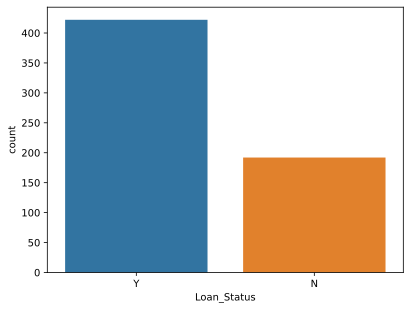

In [58]:
sns.countplot(data=df, x=target)

In [60]:
# P(Acceptance) ~ 69% 
# P(Rejection) ~ 31%

In [61]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


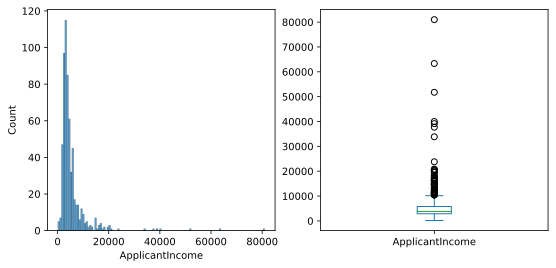

In [74]:
plt.subplot(121)
sns.histplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(9,4))

plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

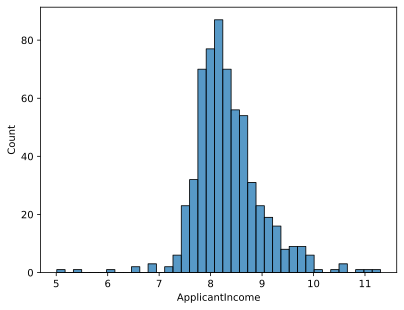

In [75]:
sns.histplot(np.log(df['ApplicantIncome']))

In [76]:
df[['ApplicantIncome', 'Loan_Status']]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [79]:
df.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [84]:
from scipy import stats

# Ho = ApplicantIncome and Loan status are independent 
# Ha = ApplicantIncome and Loan status are not independent 

stats.ttest_ind(df[df[target] =="Y"]["ApplicantIncome"],
                df[df[target] =="N"]["ApplicantIncome"])

# p value is very high so I cant reject H0 ; ApplicantIncome and Loan status are independent 

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

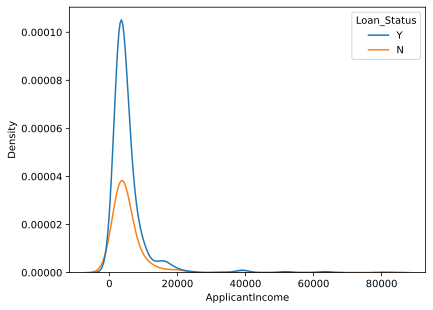

In [85]:
sns.kdeplot(data = df[['ApplicantIncome', 'Loan_Status']], 
            x = 'ApplicantIncome', 
            hue = 'Loan_Status')

In [88]:
def feature_selector(df, col_name):
    
    alpha = 0.05
    
    _, p_value = stats.ttest_ind(df[df[target] =="Y"][col_name],
                                 df[df[target] =="N"][col_name])
    
    if p_value < alpha:
        print(f"{col_name} is a good feature") 
    else:
        print(f"{col_name} is a bad feature") 
    
    

In [89]:
feature_selector(df, 'ApplicantIncome')

ApplicantIncome is a bad feature


In [90]:
feature_selector(df, 'LoanAmount')

LoanAmount is a bad feature


In [108]:
# Create a contingency table
contingency_table = pd.crosstab(
    df['Credit_History'], df[target]
)

In [109]:
contingency_table

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [110]:
# Ho = Credit_History and Loan status are independent 
# Ha = Credit_History and Loan status are not independent 

scipy.stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

In [111]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [113]:
feature_selector(df, 'TotalIncome')

TotalIncome is a bad feature


In [118]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

In [125]:
df['Loan_Amount_per_year'] = df['LoanAmount']*1000/df['Loan_Amount_Term']

In [126]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,0.355556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,0.183333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,0.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,0.197222
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,0.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,0.702778
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,0.519444


In [127]:
df['emi'] = df['Loan_Amount_per_year']/12

In [129]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,391.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,197.222222
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,222.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,702.777778
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,519.444444


In [133]:
(df['TotalIncome']* 0.3 > df['emi']).astype('int')

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Length: 614, dtype: int64

In [134]:
df["Able_to_pay"] = (df['TotalIncome']* 0.3 > df['emi']).astype('int')

In [135]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi,Able_to_pay
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,197.222222,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,222.222222,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,702.777778,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,519.444444,1


In [139]:
# Create a contingency table
contingency_table = pd.crosstab(
    df['Able_to_pay'], df[target], normalize='index'
)

In [140]:
contingency_table

Loan_Status,N,Y
Able_to_pay,,
0,0.475000,0.525000
1,0.301394,0.698606


In [141]:
contingency_table = pd.crosstab(
    df['Able_to_pay'], df[target]
)

In [142]:
# Ho = Able_to_pay and Loan status are independent 
# Ha = Able_to_pay and Loan status are not independent 

scipy.stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

In [ ]:
# p_value < alpha 
# Reject Ho, so this is a nice feature 
